# Project I

Instructions:

Before even working please, make an account on kaggle to download the required dataset.

Read every block of code and text, implement every function or task tagged with the word "TASK".

## Kaggle

Kaggle is one of the main sources for datasets, and practicing data science, and machine learning, it's the github of data science.


## Dataset

Create a folder named dataset on the root directory, after making your account and the folder download the [housing prices dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset), The following script already cretes the dataset folder for you

In [1]:
import os 

path = os.path.join("./", "dataset")
try:
    os.mkdir(path)
except Exception as err:
    print(err)

After downloading the dataset, you'll have a .zip file, decompress the .csv file onto the ./dataset folder, now you'll be ready to work

In [7]:
import pandas as pd # for reading the dataset
import numpy as np # for data transformation
from scipy.stats import gamma

from sklearn.linear_model import LinearRegression,ElasticNet # linear models
from sklearn.tree import DecisionTreeRegressor # tree model
from sklearn.ensemble import RandomForestRegressor # RandomForest

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt #plotting
import seaborn as sns

The following open's the dataset and prints the first rows 

In [113]:
df = pd.read_csv("./dataset/housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Exploration

Pandas is a library that provides a lot of things, one of them is data exploration, it provides quick statistics, and plot capabilities

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


pandas describe method gives quick stats for numerical columns of the dataset

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Visualizing data

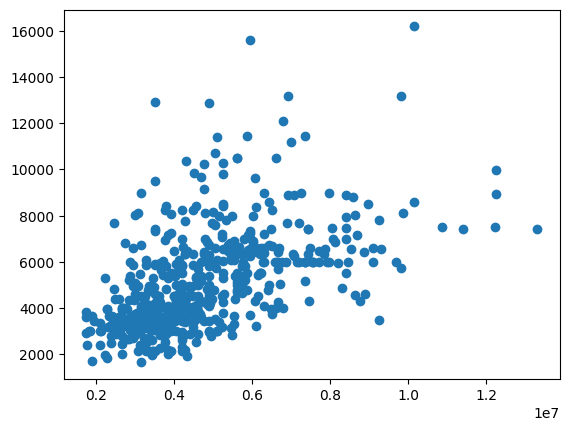

In [12]:
plt.scatter(df['price'], df['area'])

Text(0.5, 1.0, '# bedrooms')

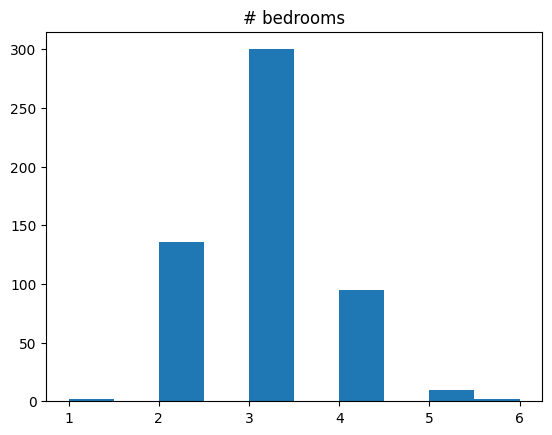

In [13]:
plt.hist( df['bedrooms'])
plt.title('# bedrooms')

# Let's create a function for plotting histograms

In [74]:
def plot_hist(data, title: str):
    """
    Plots a histogram from a provided data.

    Args:
        data: -> a pandas column

        title : str -> the title of the plot
    """
    
    n, bins, patches = plt.hist(x=data, color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title(title,fontsize=15)
    plt.show()

In [80]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


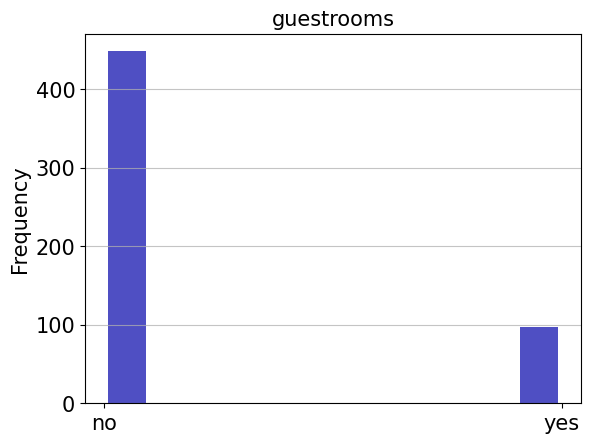

In [16]:
plot_hist(df['guestroom'], 'guestrooms')

Let's plot multiple graphs in one line

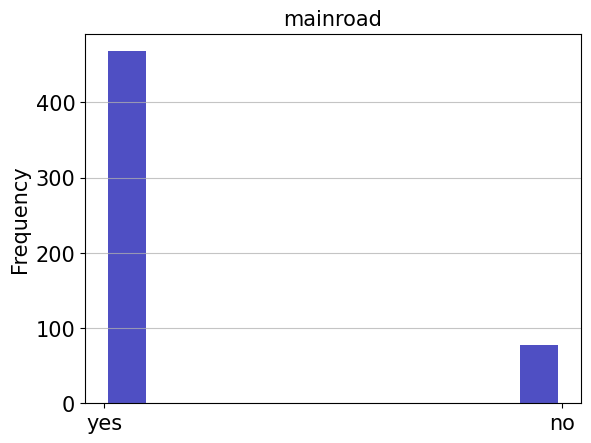

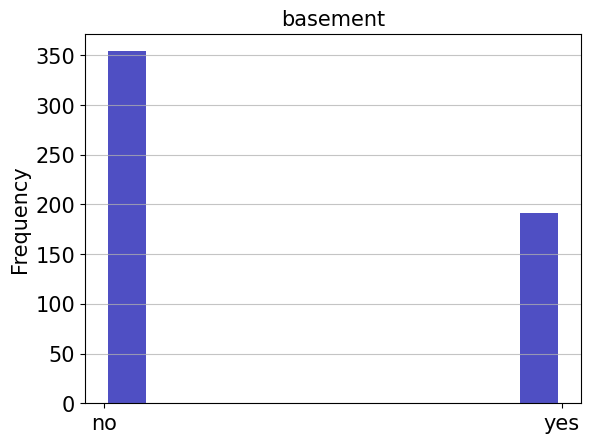

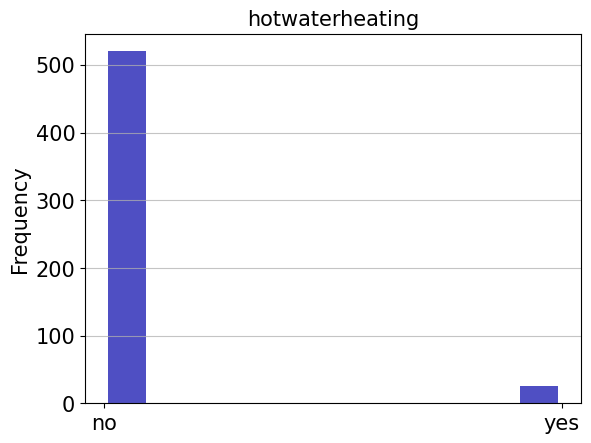

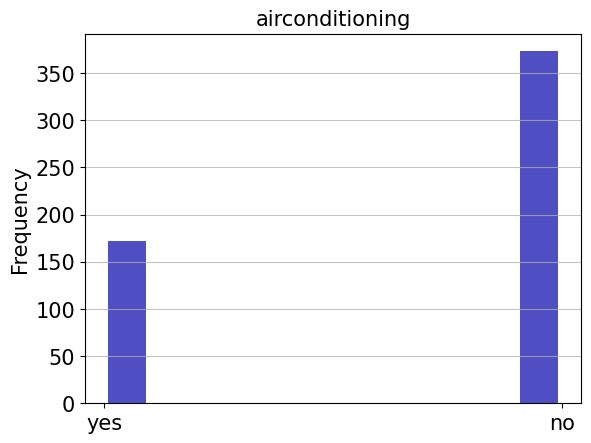

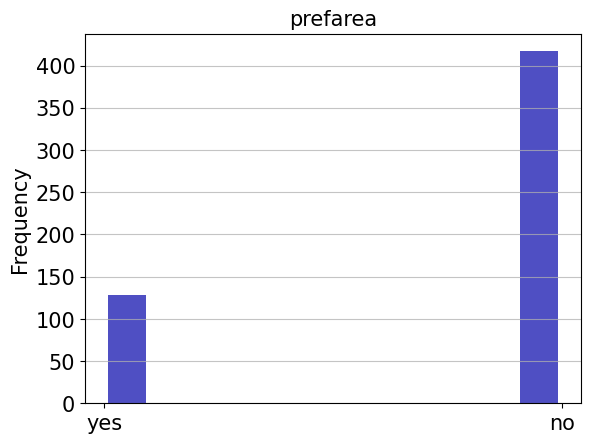

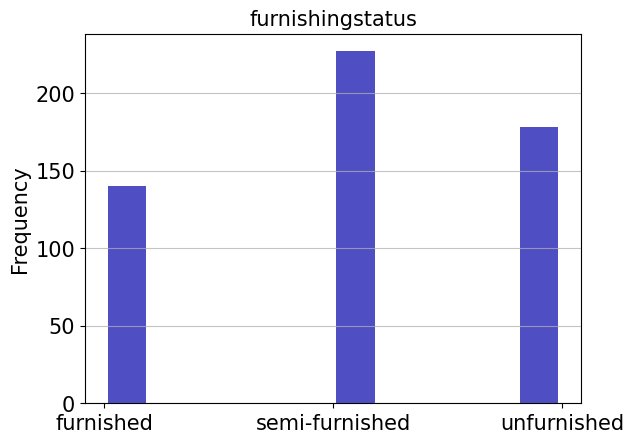

In [17]:
columns_to_plot = ['mainroad','basement','hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for i in columns_to_plot:
    plot_hist(df[i], i)

Let's now see a distribution with a non-discrete variable

[Text(0.5, 1.0, 'area distribution')]

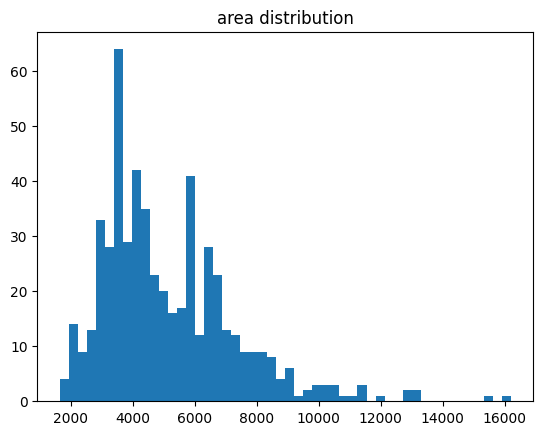

In [18]:
plt.hist(df['area'], bins = 50)
plt.gca().set(title='area distribution')

/var/folders/5b/0lywwf5s4dl2tyqd1jd25vjr0000gp/T/ipykernel_6165/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

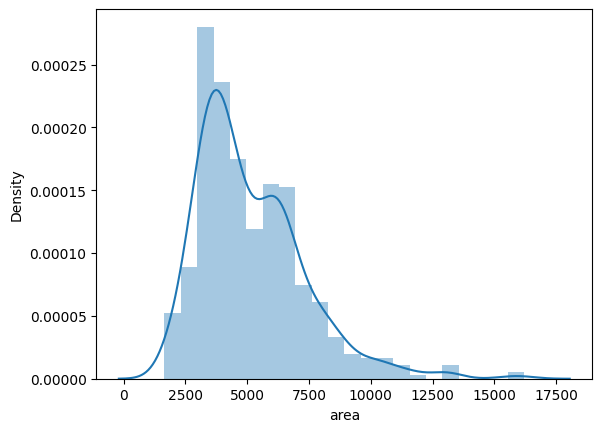

In [19]:
sns.distplot(df['area'])

It resembles a gamma probability distribution (we have not seen this yet), as the following:

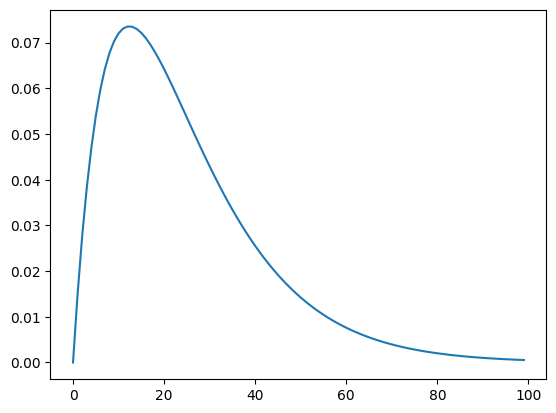

In [20]:
x = np.linspace (0, 40, 100) 
y = gamma.pdf(x, a=2, scale=5)

plt.plot(y)


Let's plot the price distribution

/var/folders/5b/0lywwf5s4dl2tyqd1jd25vjr0000gp/T/ipykernel_6165/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

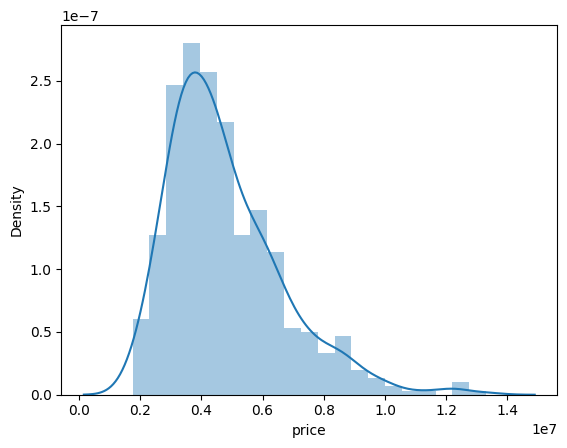

In [21]:
sns.distplot(df['price'])

In [22]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data transformation

Machine learning models cannot understand words such as "yes" "no", "furnished" etc, so we need to encoded this data onto descriptive numbers so the model can understand

## TASK #1

Perform a data transformation, use either pandas .apply function or .replace to change words such as "yes" and "no" into binary values, e.g 1 (yes) and 0 (no),
wrap this functionality into a generic function for avoiding repeating code, implement a encode_to_binary function and apply it to every necessary column.

In [131]:
def encode_to_binary(df : pd.DataFrame, columns:str | list):
    """
    TODO
    Applies a binary transformation onto a column of a target dataset.
    """
    # df.head()
    if isinstance(columns, str):
        df[columns] = df[columns].replace({"yes": 1, "no": 0})
    elif isinstance(columns, list):
        for col in columns:
            df[col] = df[col].replace({"yes": 1, "no": 0})
    return 


In [134]:
encode_to_binary(df, ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"])

### Before transformations

In [135]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,1,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,1,furnished


In [40]:
df['mainroad'] = encode_to_binary(df, 'mainroad')

# After Transformations

In [41]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


We still have a variable that need to be encoded "furnishingstatus", let's see the different values that this column has:

In [43]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

We see that it has 3 categories, we can't apply binary encoding to it, we should perform a common categorical transformation called one-hot encoding, this allows us to encode
multiple categories into a descriptive form for the model.

# TASK #2
Perform one-hot encoding on the "furnishingstatus" column, by using the pd.get_dummies function

## Note 

pd.get_dummies automatically detects which columns contains multiple categories, you should get 3 new columns that corresponds to the categories of "furnishingstatus"

In [53]:
#TODO Apply one-hot encoding using pd.get_dummies

In [49]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


# Preparing the data for the model

We need to split the dataset into 2 subsets of data, one subset is the "training set" the other is the "test/validation set", the first one is used to train the model, the second one is used to perform metrics and validate the predictive power of the model.

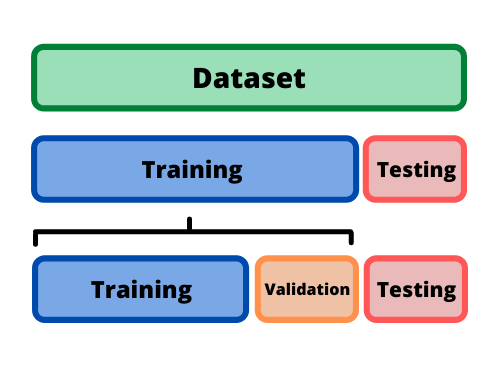


# TASK #3 
create a training set, and a test/validation set by using the .train_test_split function, search which parameters must me passed

$$ y = mx + b $$

where 
y  = price (variable to predict)

x = inputs

In [50]:
X_train, X_test , y_train, y_test = train_test_split()

Inputs

In [51]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
55,6000,3,1,2,1,0,0,0,1,1,0,0,0,1
49,7440,3,2,1,1,1,1,0,1,0,1,0,1,0
41,6360,3,2,4,1,0,0,0,1,0,1,1,0,0
102,5500,3,2,4,1,1,0,0,1,1,0,0,1,0
453,3069,2,1,1,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2430,3,1,1,0,0,0,0,0,0,0,0,0,1
378,2275,3,1,3,1,0,0,1,1,0,1,0,1,0
293,4410,2,1,1,0,0,0,0,0,1,0,0,0,1
81,4000,3,2,2,1,0,1,0,1,1,0,0,1,0


Variable to predict

In [52]:
y_train

55     7350000
49     7420000
41     7840000
102    6195000
453    3150000
        ...   
501    2660000
378    3640000
293    4200000
81     6615000
114    6020000
Name: price, Length: 408, dtype: int64

# TASK #4 

Train a LinearRegression model by using the LinearRegression class.

Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [41]:
regressor = LinearRegression()

#TODO 
# fit the data onto the regressor

# Task #5 

Score the model by using the .score method and the training set

In [27]:
regressor.score(X_train,y_train)

0.6834725490949498

# Task #6 

Put the model in prediction mode, and pass the test/validation set, then get the r2 score, and the mean squared error of the predictions

In [42]:
#TODO search how to put the regressor in prediction mode
predictions = regressor.

SyntaxError: invalid syntax (750346389.py, line 2)

In [43]:
def get_metrics(y_true : list, predictions:list):
    """
    Prints the scores of the model
    """
    r2 = r2_score(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    mae = mean_absolute_error(y_true,predictions)

    print(f"r2: {r2}, mse: {mse}, mae: {mae}")

In [30]:
get_metrics(y_test, predictions)

r2: 0.6658057400181396, mse: 1278905337187.1409, mae: 779093.8281559909


We can now plot the predictions vs the test/validation set, this should resemble a line, when r2 is 1, it's completely a line, and it's said to be 100% accurate in predictions

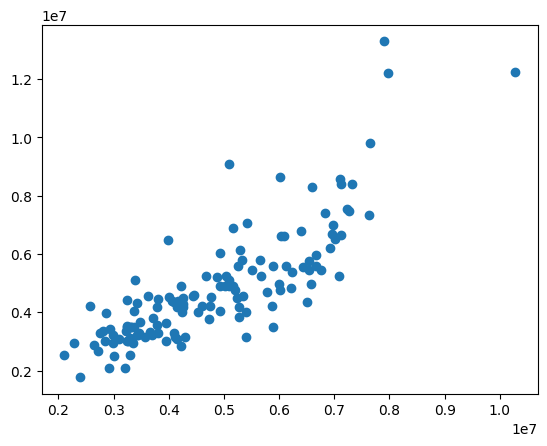

In [31]:
plt.scatter(predictions,y_test)

# Task #7

Now that you now what the r2 score is, implement a function that calculates the score, instead of calling sklearn's r2_score function, just pass into code the following:


$$R^2 = 1 - \frac{RSS}{TSS} $$

Where

$$RSS = (\Sigma(y_{i} - \hat{y}_{i})^2 $$

and

$$TSS = (\Sigma(y_{i} - \overline{y}_{i})^2 $$

$y_{i} $= the actual value

$\hat{y}_{i}$ = the predicted value from the model

and 

$\overline{y}$ = the mean of the value of the feature

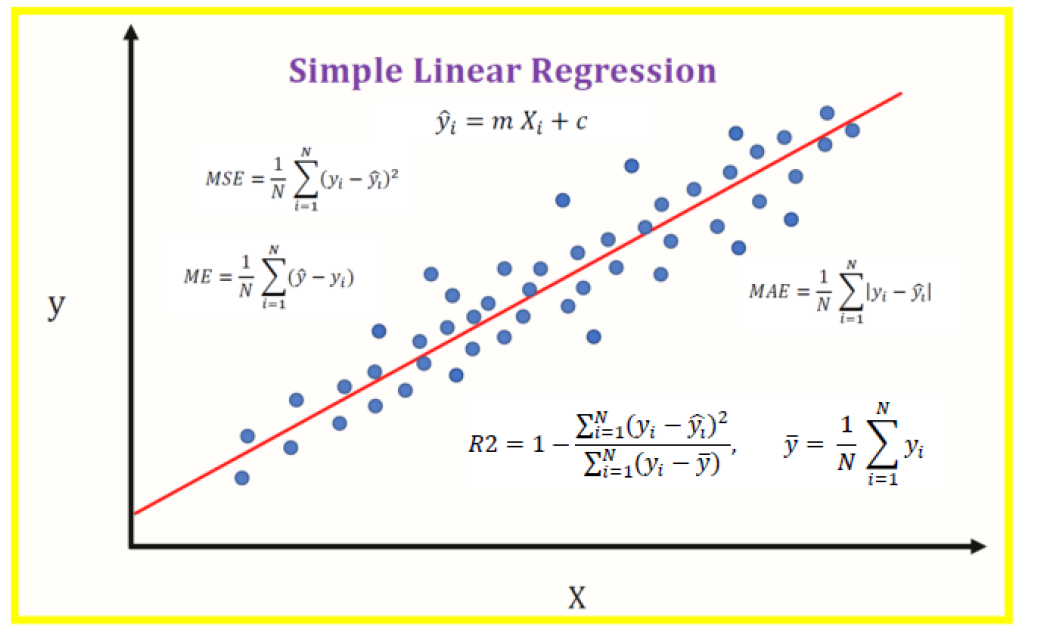

In [55]:
def get_r2_score(y_true,predictions):
    """
    TODO
    Calculates the r2 score of the predictions of a regression model
    """
    return

# Task #8

Choose and apply a different model to try and get a better score (r2 score), use any of the following:

- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)